In [100]:
import matplotlib.pyplot as plt
import torch as pt
plt.rcParams["figure.dpi"] = 160

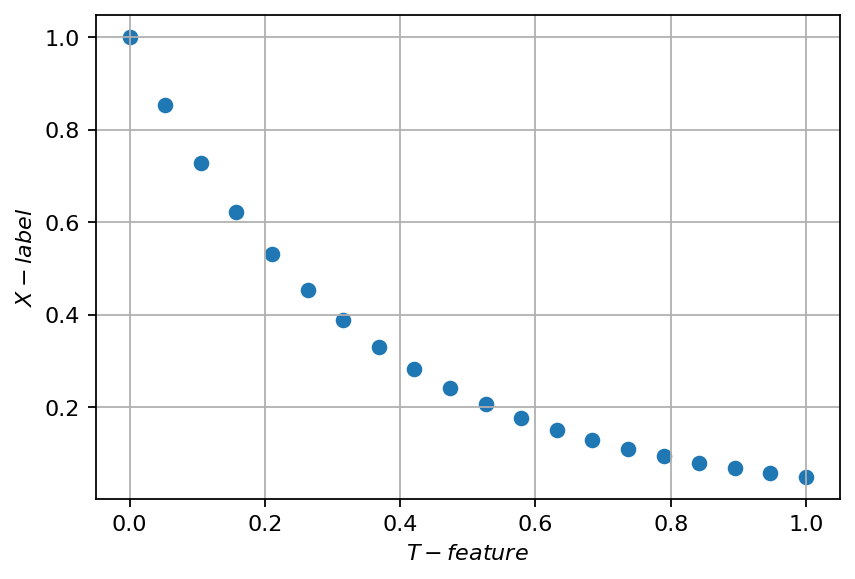

<Figure size 400x800 with 0 Axes>

In [113]:
t = pt.linspace(0.0,1.0,20)
k =3.0
x = pt.exp(-k*t)


plt.scatter(t,x)
plt.xlabel(r"$T - feature$")
plt.ylabel(r"$X - label$")
plt.grid()
plt.figure(figsize = (2.5,5))
plt.show()


In [102]:
##guessing a solution
def f(t,a,b,c,d):
    return a*t**4 + b*t**3 + c*t**2 + d*t + 1
def dfda(t):
    return t**4
def dfdb(t):
    return t**3
def dfdc(t):
    return t**2
def dfdd(t):
    return t

In [103]:
def Loss(x_true,t,a,b,c,d):
    loss =  0.5*(x_true - f(t,a,b,c,d) )**2
    return loss.mean()

In [104]:
def gradient(x_true,t,a,b,c,d):
    A = ((x_true - f(t,a,b,c,d))*(-dfda(t))).mean()
    B = ((x_true - f(t,a,b,c,d))*(-dfdb(t))).mean()
    C = ((x_true - f(t,a,b,c,d))*(-dfdc(t))).mean()
    D = ((x_true - f(t,a,b,c,d))*(-dfdd(t))).mean()
    return pt.stack((A,B,C,D))

In [105]:
weights = pt.rand(4)
weights
loss_value = []
iter = 10000
weights_history = pt.zeros(iter+1,4)
weights_history[0,:] = weights
loss_value.append(Loss(x,t,*weights))


In [106]:
for i in range(iter):
    weights = weights - gradient(x,t,*weights)
    weights_history[i+1,:] = weights
    loss_value.append(Loss(x,t,*weights))

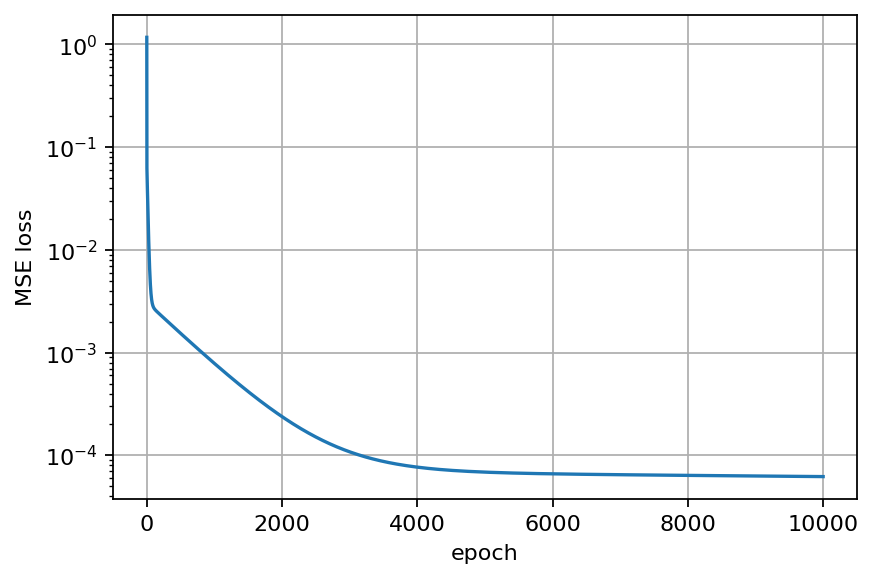

In [107]:
plt.plot(range(len(loss_value)),loss_value)
plt.yscale("log")
plt.xlabel("epoch")
plt.ylabel("MSE loss")
plt.grid()
plt.show()

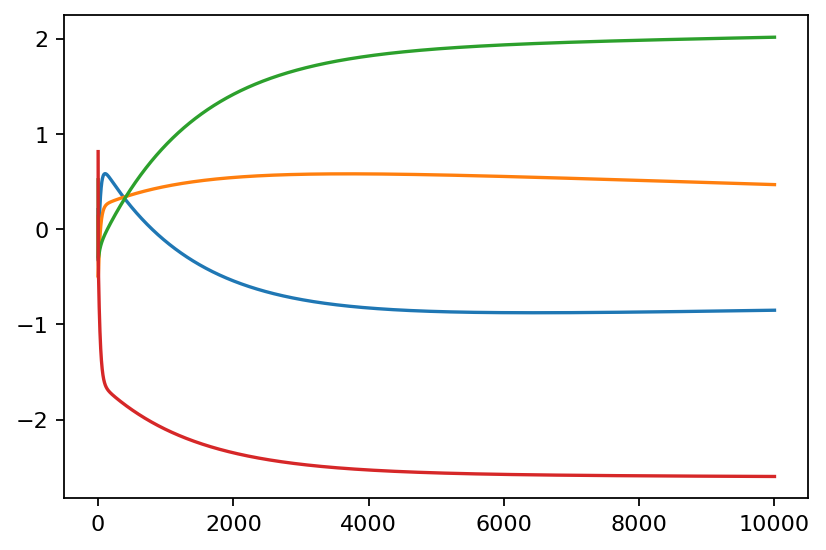

In [108]:
plt.plot(range(len(weights_history)),weights_history)

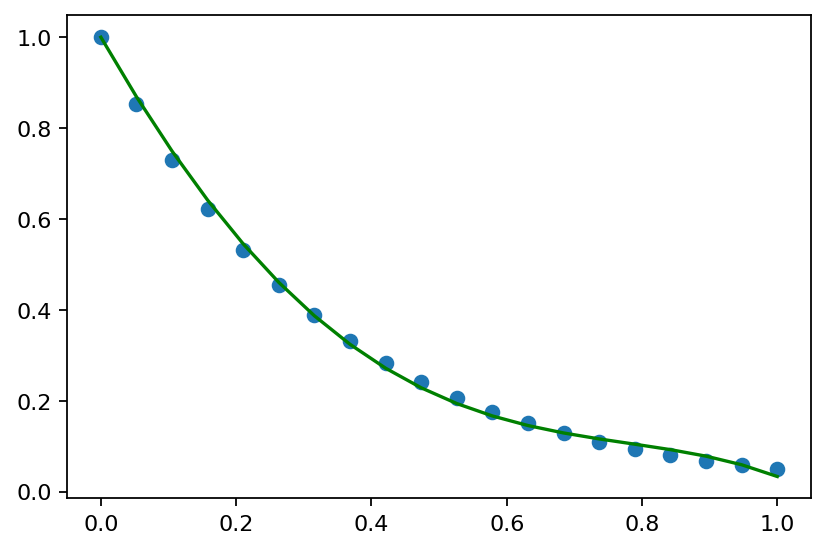

In [115]:
plt.scatter(t,x)
plt.plot(t,f(t,*weights),color = "green")